/kaggle/input/biomechanical-features-of-orthopedic-patients/column_3C_weka.csv
/kaggle/input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv


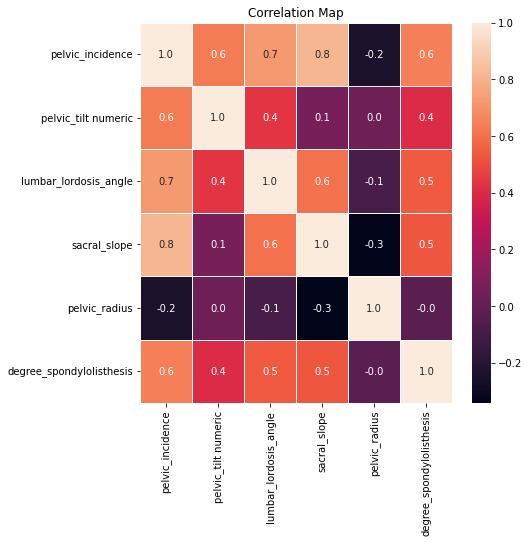

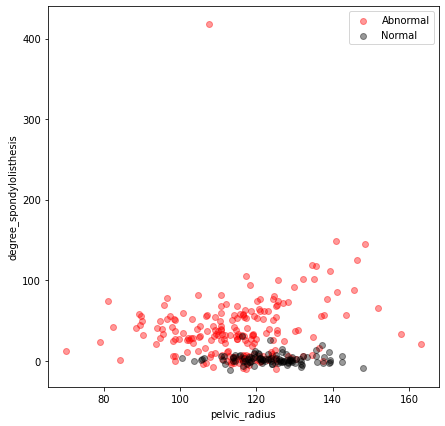

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [1]:
# Notebook forked from https://www.kaggle.com/code/sercanyesiloz/k-nearest-neighbor-knn/notebook

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
data = pd.read_csv('../input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv')
data.head(10)

f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(data.corr('pearson'),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)

plt.xticks(rotation=90)

plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()





A = data[data["class"] == "Abnormal"]
N = data[data["class"] == "Normal"]

plt.figure(figsize=(7,7))
plt.scatter(A.pelvic_radius, A.degree_spondylolisthesis, label="Abnormal", color="red", alpha=0.4)
plt.scatter(N.pelvic_radius, N.degree_spondylolisthesis, label="Normal", color="black", alpha=0.4)
plt.xlabel("pelvic_radius")
plt.ylabel("degree_spondylolisthesis")
plt.legend()
plt.show()

data["class"] = [1 if each == "Abnormal" else 0 for each in data["class"]]
y=data["class"].values
print(y)

x_data = data.drop(["class"], axis= 1)
x_data.head()

x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=40)


